In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
X_train = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/train_X.csv").T.values
X_test = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/test_X.csv").T.values
Y_train = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/train_label.csv").T.values
Y_test = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/test_label.csv").T.values
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 999)
(10, 999)
(784, 349)
(10, 349)


In [263]:
# X_train = X_train/255
# X_test = X_test/255

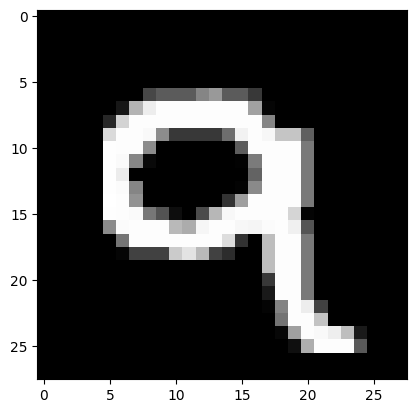

In [264]:
idx = np.random.randint(0,X_train.shape[1])
plt.imshow(X_train[:, idx].reshape(28,28),cmap='gray')
plt.show()

In [265]:
def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX,axis=0)

In [266]:
def derivative_relu(x):    
    return np.array(x>0,dtype='float32')

In [267]:
def initialise_parameters(n_x,n_h1,n_h2,n_y):
    w1 = np.random.randn(n_h1,n_x)*0.001
    b1 = np.zeros((n_h1,1))

    w2 = np.random.randn(n_h2,n_h1)*0.001
    b2 = np.zeros((n_h2,1))

    w3 = np.random.randn(n_y,n_h2)*0.001
    b3 = np.zeros((n_y,1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3
    }
    return parameters

In [268]:
def forward_prop(x,parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    w3 = parameters['w3']
    b3 = parameters['b3']

    z1 = np.dot(w1,x)+b1
    a1 = relu(z1)

    z2 = np.dot(w2,a1)+b2
    a2 = relu(z2)

    z3  = np.dot(w3,a2)+b3
    a3 = softmax(z3)

    forward_cache=  {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
        "z3" : z3,
        "a3" : a3
    }
    return forward_cache
    

In [269]:
def cost_func(a3,y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a3))
    return cost

In [270]:
def backward_prop(x,y,parameters,forward_cache):

    m = x.shape[1]

    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    w3 = parameters['w3']
    b3 = parameters['b3']

    z1 = forward_cache['z1']
    a1 = forward_cache['a1']

    z2 = forward_cache['z2']
    a2 = forward_cache['a2']

    z3 = forward_cache['z3']
    a3 = forward_cache['a3']

    dz3 = a3-y
    dw3 = (1/m)*np.dot(dz3,a2.T)
    db3 = (1/m)*np.sum(dz3,axis=1,keepdims=True)

    dz2 = np.dot(w3.T,dz3)*derivative_relu(z2)
    dw2 = (1/m)*np.dot(dz2,a1.T)
    db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)

    dz1 = np.dot(w2.T,dz2)*derivative_relu(z1)
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2,
        "dw3" : dw3,
        "db3" : db3

    }
    return gradients


In [271]:
def update_parameters(parameters,gradients,learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    w3 = parameters['w3']
    b3 = parameters['b3']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    dw3 = gradients['dw3']
    db3 = gradients['db3']

    #print(type(w1))
    # print(len(dw1))
    # print(len(w1))

    w1 = w1 - (learning_rate*dw1)
    b1 = b1 - learning_rate*db1

    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    w3 = w3 - learning_rate*dw3
    b3 = b3 - learning_rate*db3

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
        "w3" : w3,
        "b3" : b3
    }
    return parameters

In [272]:
def model(x,y,n_h1,n_h2,learning_rate,epochs):
    
    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []

    parameters = initialise_parameters(n_x,n_h1,n_h2,n_y)
    for i in range(epochs):
        forward_cache = forward_prop(x,parameters)
        a3 = forward_cache['a3']
        cost = cost_func(a3,y)
        cost_list.append(cost)
        gradients = backward_prop(x,y,parameters,forward_cache)
        parameters = update_parameters(parameters,gradients,learning_rate)
    

    return parameters,cost_list



In [275]:
epochs = 150
learning_rate = 0.001
n_h1 = 1000
n_h2 = 1000
parameters,cost_list = model(X_train,Y_train,n_h1=n_h1,n_h2=n_h2,learning_rate=learning_rate,epochs=epochs)
cost_list

[2.3026639434898803,
 2.3026250945316185,
 2.3025862530998316,
 2.3025474459671686,
 2.3025086222681304,
 2.302469788391972,
 2.3024309635128466,
 2.302392147260853,
 2.3023533290094376,
 2.3023145107978196,
 2.3022756723667555,
 2.3022368042654917,
 2.302197908221512,
 2.3021589992433356,
 2.302120074449257,
 2.3020811127461744,
 2.3020421403464137,
 2.302003138603037,
 2.301964098392176,
 2.3019250206629174,
 2.3018858685491956,
 2.301846643885851,
 2.301807323659373,
 2.3017679150461925,
 2.3017284269726437,
 2.3016888392305064,
 2.3016491674347366,
 2.301609413864505,
 2.301569564411624,
 2.301529593410924,
 2.3014895014119787,
 2.301449289952053,
 2.3014089457089306,
 2.3013684832798744,
 2.3013278727292312,
 2.301287102794045,
 2.3012462031982657,
 2.301205169526982,
 2.301163981258703,
 2.3011226036536154,
 2.301081077458741,
 2.3010393748141693,
 2.3009975132073577,
 2.300955484630481,
 2.3009132742551324,
 2.3008708545666976,
 2.3008282303298877,
 2.3007853992484995,
 2.300742

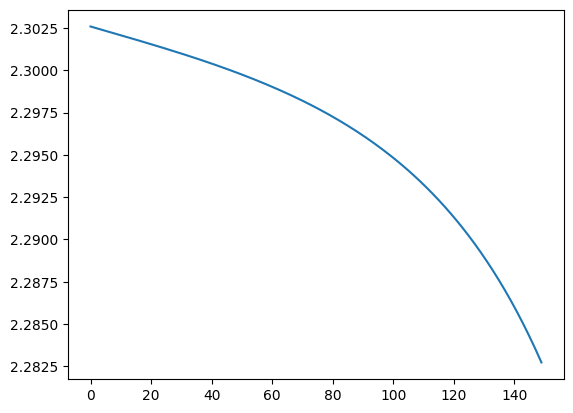

In [274]:
rng = np.arange(0,epochs)
plt.plot(rng,cost_list)
plt.show()